In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as ipy
from ipywidgets import Output
df = pd.read_csv('/Users/lucianoleroi/Desktop/piscine/Jour7/weather.csv')

output= Output()
with output:
  
  display(df)
 

display(output)


Output()

<Axes: xlabel='min_temp_c', ylabel='max_temp_c'>

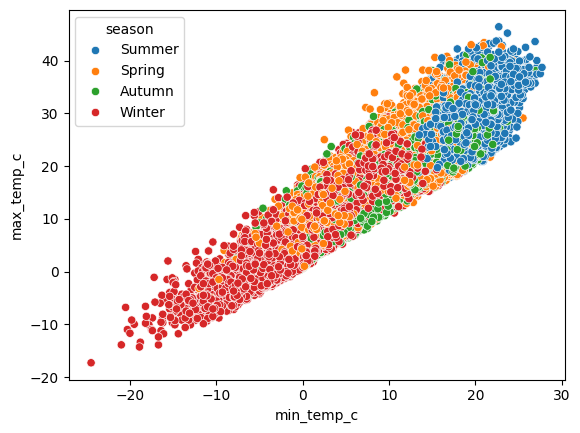

In [27]:


sns.scatterplot(data=df, x = "min_temp_c", y = "max_temp_c", hue="season")

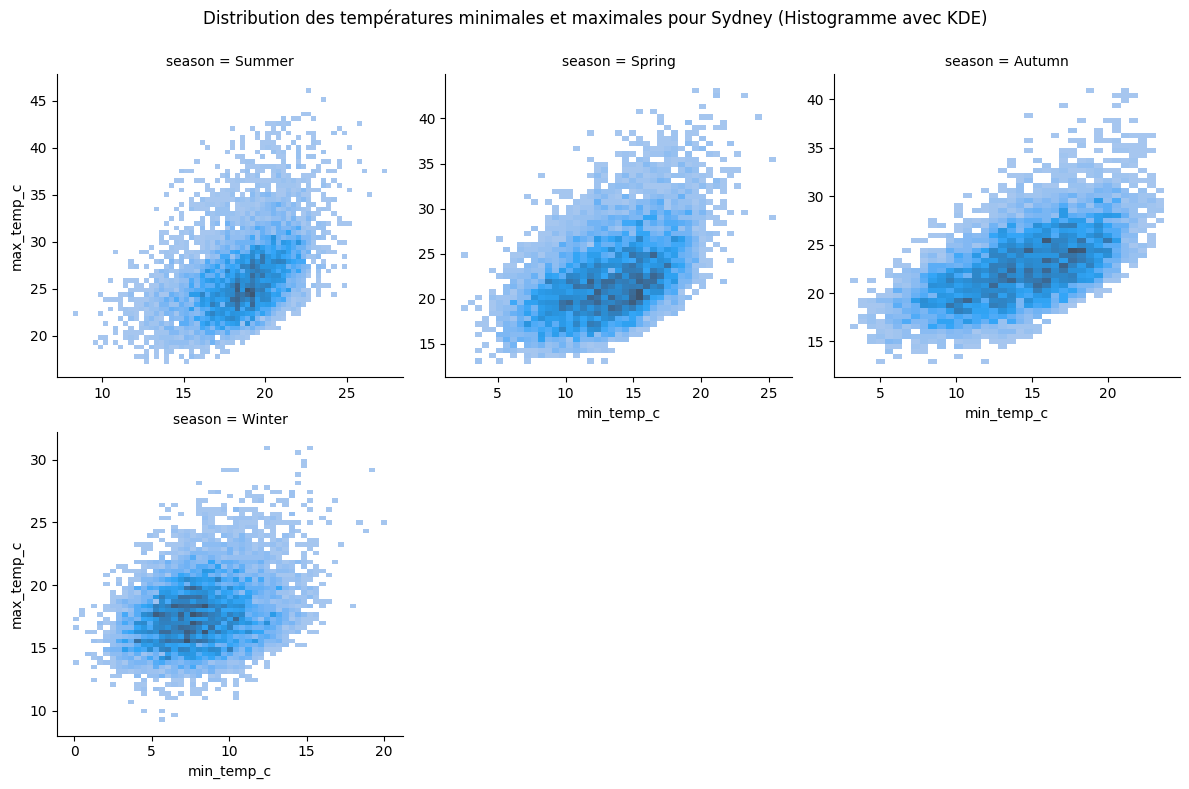

In [50]:
def plot_distribution_histogram_kde(df, city):
    city_data = df[df['city_name'] == city]
    g = sns.FacetGrid(city_data, col="season", col_wrap=3, height=4, sharex=False, sharey=False)
    g.map(sns.histplot, "min_temp_c", "max_temp_c", kde=True)
    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Distribution des températures minimales et maximales pour {city} (Histogramme avec KDE)')
    plt.show()

plot_distribution_histogram_kde(df, "Sydney")


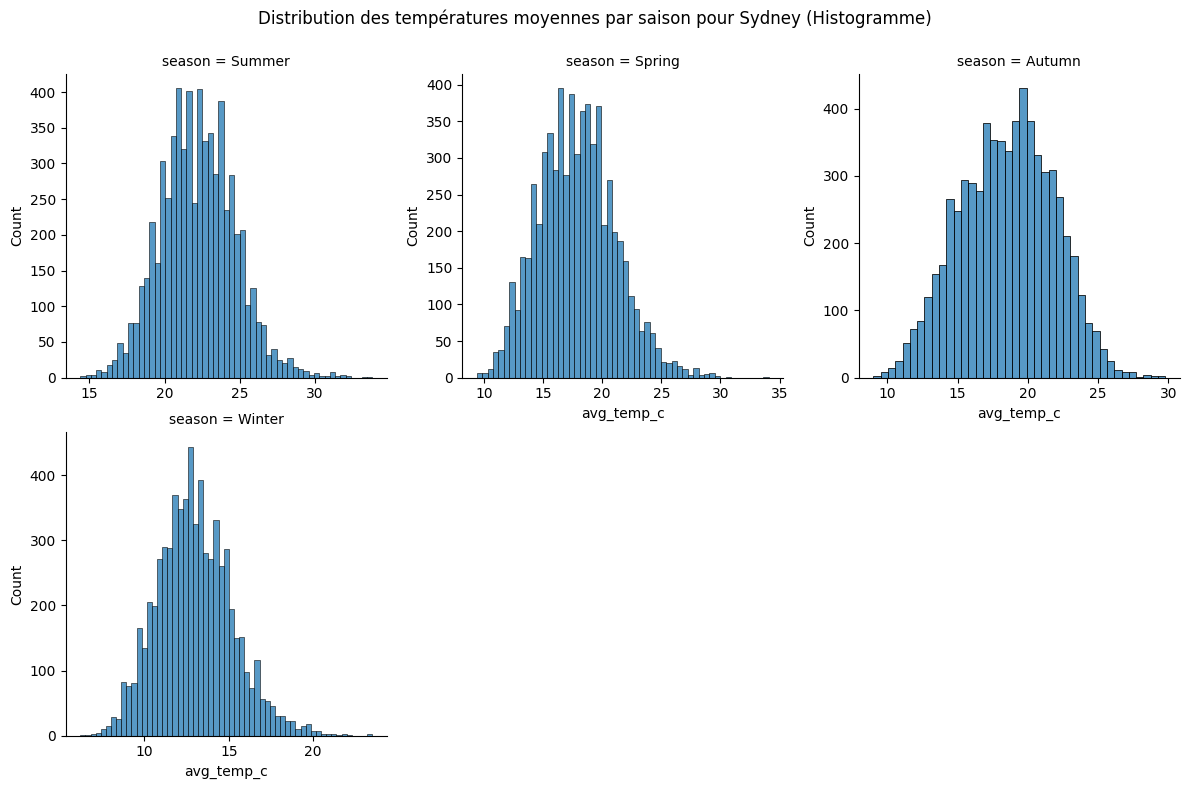

In [51]:
def plot_distribution_histogram(df, city):
    city_data = df[df['city_name'] == city]
    g = sns.FacetGrid(city_data, col="season", col_wrap=3, height=4, sharex=False, sharey=False)
    g.map(sns.histplot, "avg_temp_c")
    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Distribution des températures moyennes par saison pour {city} (Histogramme)')
    plt.show()


plot_distribution_histogram(df, "Sydney")

<Axes: xlabel='avg_wind_speed_kmh'>

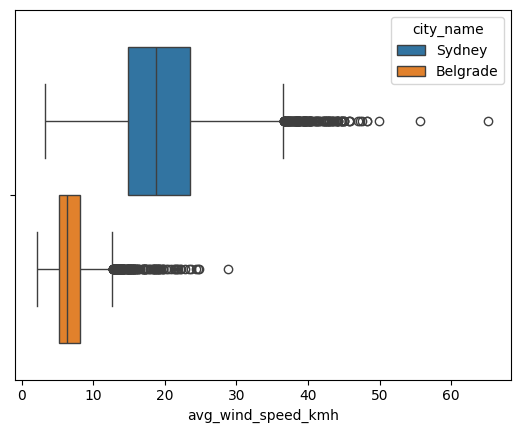

In [52]:
sns.boxplot(data=df,x="avg_wind_speed_kmh",hue="city_name",y="city_name")

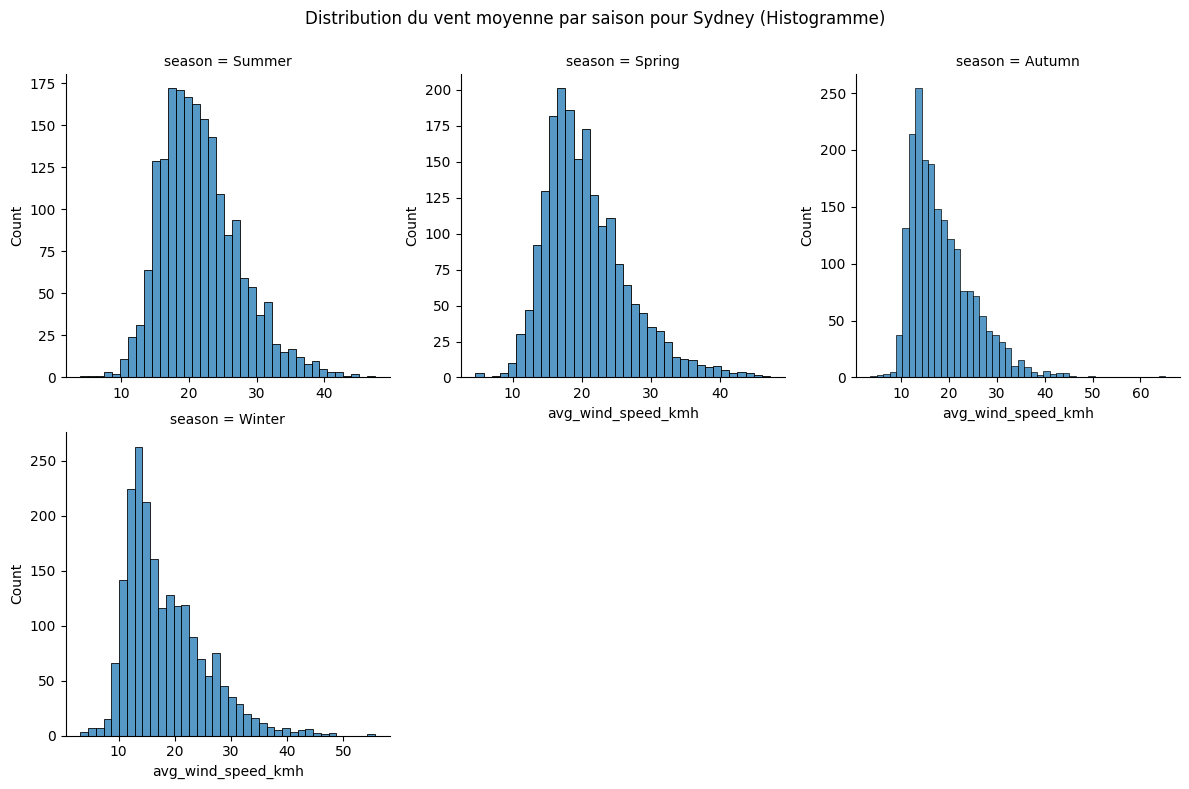

In [59]:
def plot_distribution_histogram(df, city):
    city_data = df[df['city_name'] == city]
    g = sns.FacetGrid(city_data, col="season", col_wrap=3, height=4, sharex=False, sharey=False)
    g.map(sns.histplot, "avg_wind_speed_kmh")
    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Distribution du vent moyenne par saison pour {city} (Histogramme)')
    plt.show()


plot_distribution_histogram(df, "Sydney")

<Axes: xlabel='avg_temp_c', ylabel='city_name'>

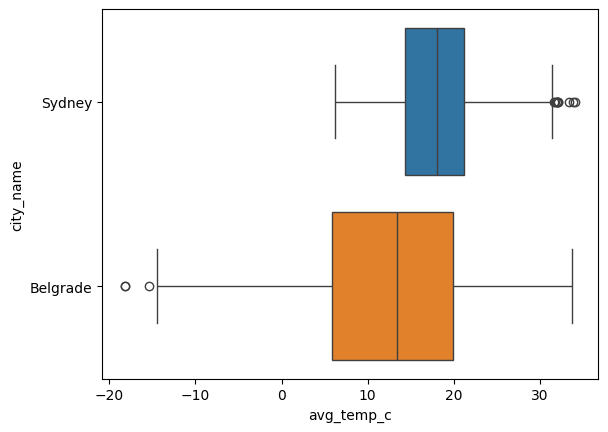

In [60]:
sns.boxplot(data=df,x="avg_temp_c",hue="city_name",y="city_name")

/Users/lucianoleroi/Desktop/piscine/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


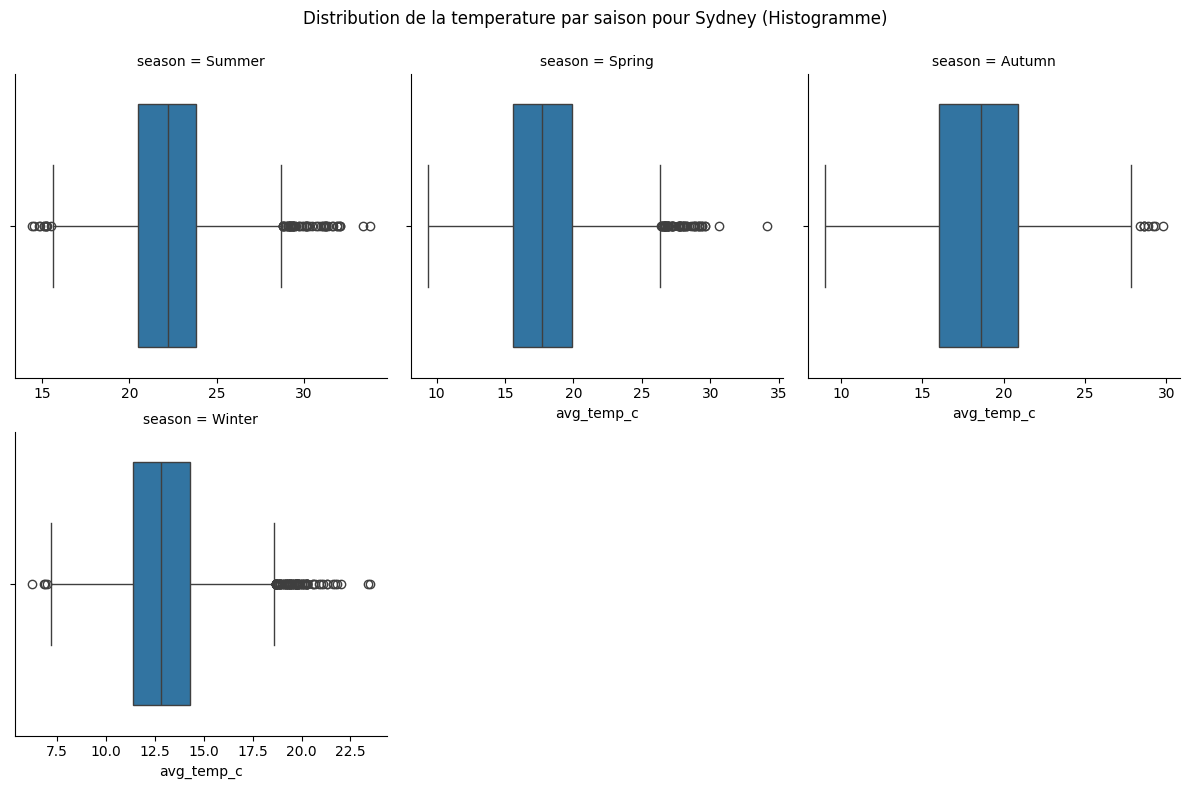

In [62]:
def plot_distribution_histogram(df, city):
    city_data = df[df['city_name'] == city]
    g = sns.FacetGrid(city_data, col="season", col_wrap=3, height=4, sharex=False, sharey=False)
    g.map(sns.boxplot, "avg_temp_c")
    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Distribution de la temperature par saison pour {city} (Histogramme)')
    plt.show()


plot_distribution_histogram(df, "Sydney")

Dans le Notebook « weather » : 
• Calculer la température moyenne pour chaque année pour une ville donnée. Supprimer 
les données manquantes puis afficher le modèle de régression associé, 
• Calculer la température moyenne par saison et par année pour une ville donnée. 
Supprimer les données manquantes puis afficher le modèle de régression associé, 
• Noter vos conclusions / observations pour cet exercice. 

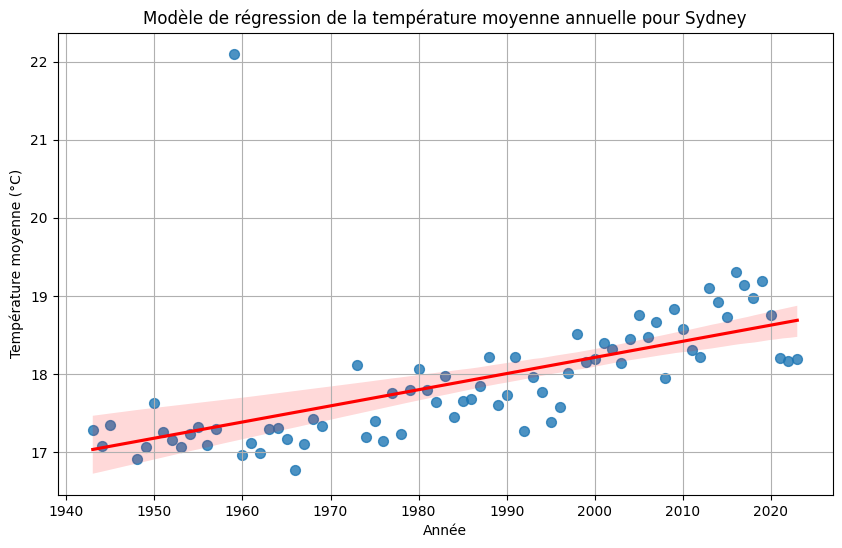

In [70]:
def plot_regression(df, city):
   
    city_data = df[df['city_name'] == city]
    city_data = city_data.dropna(subset=['avg_temp_c'])
    city_data['date'] = pd.to_datetime(city_data['date'])
    city_data['year'] = city_data['date'].dt.year
    city_data_yearly_mean = city_data.groupby('year')['avg_temp_c'].mean().reset_index()
    
    # modèle de régression
    plt.figure(figsize=(10,6))
    sns.regplot(data=city_data_yearly_mean, x="year", y="avg_temp_c", scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'Modèle de régression de la température moyenne annuelle pour {city}')
    plt.xlabel('Année')
    plt.ylabel('Température moyenne (°C)')
    plt.grid(True)
    plt.show()


plot_regression(df, "Sydney")

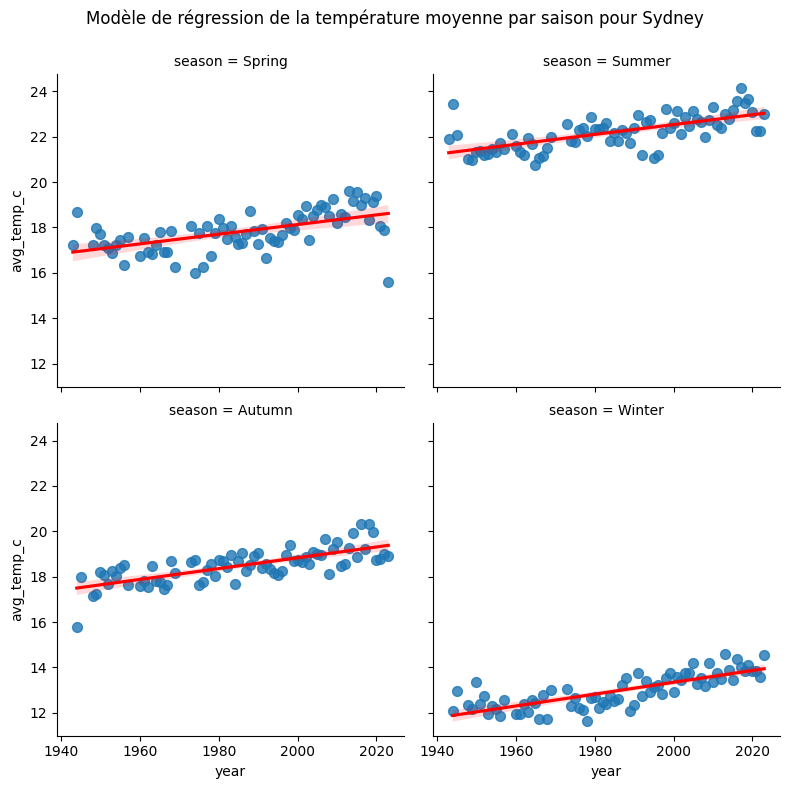

In [73]:
def plot_regression_by_season(df, city):
   
    city_data = df[df['city_name'] == city]
    city_data = city_data.dropna(subset=['avg_temp_c'])
    city_data['date'] = pd.to_datetime(city_data['date'])
    city_data['year'] = city_data['date'].dt.year
    city_data_seasonal_mean = city_data.groupby(['year', 'season'])['avg_temp_c'].mean().reset_index()
    
    
    g = sns.FacetGrid(city_data_seasonal_mean, col='season', col_wrap=2, height=4)
    g.map(sns.regplot, 'year', 'avg_temp_c', scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Modèle de régression de la température moyenne par saison pour {city}')
    plt.show()
  
    

plot_regression_by_season(df, "Sydney")

Dans nos graphiques, on observe une nette augmentation des températures au fil des années. Les saisons sont très marquées et illustrent clairement, par exemple, que l'hiver reste la période la plus froide, mais avec une tendance à la hausse. Ces données illustrent de manière convaincante le phénomène de réchauffement climatique, en montrant une augmentation progressive des températures au fil du temps.